<a href="https://colab.research.google.com/github/hnhoangdz/SIT_AI/blob/main/SIT_Project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import thư viện

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import plotly.express as px
import matplotlib.pyplot as plt

# 2. Plot data frame

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/hnhoangdz/SIT_AI/main/heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## 2.1 Missing values

In [3]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_values = pd.concat([missing_number], axis=1, keys=['Missing_Values'])
    return missing_values
missing(df)

,Missing_Values
HeartDisease,0
ST_Slope,0
Oldpeak,0
ExerciseAngina,0
MaxHR,0
RestingECG,0
FastingBS,0
Cholesterol,0
RestingBP,0
ChestPainType,0


## 2.2 Stats

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## 2.3 Relationship histogram

In [5]:
def _plot_relationship(x,y):
  fig = px.histogram(df, x=x, color=y,width=600, height=400)
  fig.show()

In [6]:
_plot_relationship(x="ChestPainType",y="HeartDisease")

In [7]:
from collections import Counter
target = df.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0, Count=410, Percentage=44.662%
Class=1, Count=508, Percentage=55.338%


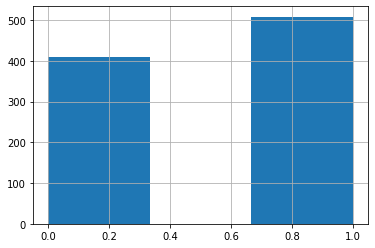

In [8]:
df['HeartDisease'].hist(bins=3)

In [9]:
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [10]:
num_list= ["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]
for i in num_list:
  mean = df[i].mean()
  std = df[i].std()
  df[i] = (df[i]-mean)/std
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.432359,0.410685,0.824621,-0.551041,1.382175,-0.831979,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,-0.478223,1.490940,-0.171867,-0.551041,0.753746,0.105606,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,-1.750404,-0.129442,0.769768,-0.551041,-1.524307,-0.831979,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,-0.584238,0.302660,0.138964,-0.551041,-1.131539,0.574398,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.051853,0.950812,-0.034736,-0.551041,-0.581664,-0.831979,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [11]:
Y = df['HeartDisease']
X = df.drop(columns=["HeartDisease"])

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=123)
y_train = np.expand_dims(y_train,axis=1)
y_test = np.expand_dims(y_test,axis=1)
X_train, X_test, y_train, y_test = X_train.T, X_test.T, y_train.T, y_test.T

In [13]:
print("Training X: ",X_train.shape)
print("Training Y: ",y_train.shape)
print("Testing X: ",X_test.shape)
print("Testing Y: ",y_test.shape)

Training X:  (20, 734)
Training Y:  (1, 734)
Testing X:  (20, 184)
Testing Y:  (1, 184)


In [14]:
print(y_test)

[[0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0
  1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1
  1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0
  0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1
  0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1
  0 0 1 1]]


# 3. Build model

In [15]:
# Initilize parameters
def init_parameters(layers_dims):
  np.random.seed(3)
  L = len(layers_dims)
  parameters = {}
  for l in range(1,L):
    parameters["W" + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*np.sqrt(2/layers_dims[l-1])
    parameters["b" + str(l)] = np.zeros((layers_dims[l],1))
  return parameters

In [16]:
def sigmoid(Z):
  A = 1/(1+np.exp(-Z))
  return A,Z
def relu(Z):
  A = np.maximum(0,Z)
  return A,Z

In [17]:
def calc_ffw(W,A_prev,b,activation):
  if activation == "sigmoid":
    Z = np.dot(W,A_prev) + b
    A,Z = sigmoid(Z)
  else:
    Z = np.dot(W,A_prev) + b
    A,Z = relu(Z)
  linear_cache = (A_prev,W,b)
  activation_cache = Z
  cache = (linear_cache, activation_cache)
  return A,cache

In [18]:
def L_model_forward(X,parameters):
  L = len(parameters)//2
  caches = []
  A = X
  for l in range(1,L):
    A_prev = A
    A,cache = calc_ffw(parameters["W"+str(l)],A_prev,parameters["b"+str(l)],"relu")
    caches.append(cache)
  AL,cache = calc_ffw(parameters["W"+str(L)],A,parameters["b"+str(L)],"sigmoid")
  caches.append(cache)
  return AL, caches

In [60]:
def compute_cost(AL,Y,parameters, lamb):
  m = AL.shape[1]
  cross_entropy_cost = -1./m*(np.dot(Y,np.log(AL).T) + np.dot((1-Y),np.log(1-AL).T))
  sum_W = 0
  for l in range(1,len(parameters)//2+1):
    sum_W += np.sum(np.square(parameters["W"+str(l)]))
  # L1_regularization_cost =  sum_W*lamb*1./(2*m)
  L2_regularization_cost =  sum_W*lamb*1./(2*m)
  # cost = np.squeeze(cross_entropy_cost + L1_regularization_cost) 
  cost = np.squeeze(cross_entropy_cost + L2_regularization_cost)   
  return cost

In [61]:
def sigmoid_grad(dA,Z):
  A,Z = sigmoid(Z)
  dZ = dA*A*(1-A)
  return dZ
def relu_grad(dA,Z):
  A,Z = relu(Z)
  dZ = np.multiply(dA, np.int64(A > 0))
  return dZ

In [62]:
def linear_backward(dZ,cache, lamb):
  A_prev, W, b = cache
  m = A_prev.shape[1] 
  dW = 1./m*(np.dot(dZ,A_prev.T) + lamb*W/np.absolute(W))
  #dW = 1./m*np.dot(dZ,A_prev.T) + lamb*W/m
  db = 1./m*np.sum(dZ,axis=1,keepdims=True)
  dA_prev = np.dot(W.T,dZ)
  return dA_prev,dW,db

In [63]:
# compute backward with activation
def linear_activation_backward(dA,cache,activation,lamb):
  linear_cache, activation_cache = cache
  if activation == "relu":
    dZ = relu_grad(dA,activation_cache)
    dA_prev,dW,db = linear_backward(dZ,linear_cache,lamb)
  elif activation == "sigmoid":
    dZ = sigmoid_grad(dA,activation_cache)
    dA_prev,dW,db = linear_backward(dZ,linear_cache,lamb)
  return dA_prev,dW,db

In [64]:
# computer L_backward for NN
def L_model_backward(AL, Y, caches,lamb):
  grads = {}
  L = len(caches)
  Y = Y.reshape(AL.shape)
  dAL = np.divide(AL - Y, np.multiply(AL, 1 - AL))
  
  current_cache = caches[-1]
  grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_cache, activation = "sigmoid",lamb=lamb)

  for l in reversed(range(L-1)):
    current_cache = caches[l]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)],  current_cache, activation = "relu", lamb=lamb)
    grads["dA" + str(l)] = dA_prev_temp
    grads["dW" + str(l + 1)] = dW_temp
    grads["db" + str(l + 1)] = db_temp
  return grads

In [65]:
def update_parameters(parameters, grads, lr):
  L = len(parameters)//2
  for l in range(L):
    parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-lr*grads["dW" + str(l+1)]
    parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-lr*grads["db" + str(l+1)]
  return parameters

In [66]:
def predict(X,Y,parameters):
  AL,cache =  L_model_forward(X,parameters)
  return np.round(AL)

In [67]:
def model(X,Y,X_test,y_test,num_iterations, learning_rate, lamb,print_cost=False):
  history = {}
  np.random.seed(3)
  input_size = X.shape[0]
  layer_dims = []
  layer_dims.append(input_size)
  layer_dims.append(7)
  layer_dims.append(5)
  layer_dims.append(1)
  parameters = init_parameters(layer_dims)
  costs = []
  test_costs = []
  acc_list = []
  test_acc_list = []
  for i in range(num_iterations):
    
    AL, caches = L_model_forward(X,parameters)
    cost = compute_cost(AL, Y,parameters,lamb=lamb)
    costs.append(cost)
    grads = L_model_backward(AL,Y,caches,lamb=lamb)
    parameters = update_parameters(parameters,grads,learning_rate)

    # training
    y_pred = predict(X,Y,parameters)
    acc = 1 - np.mean(np.abs(y_pred - Y))
    acc_list.append(acc)

    # test
    AL_test, caches_test = L_model_forward(X_test,parameters)
    test_cost = compute_cost(AL_test, y_test,parameters,lamb=lamb)
    test_costs.append(test_cost)
    y_test_pred = predict(X_test,y_test,parameters)
    test_acc = 1 - np.mean(np.abs(y_test_pred - y_test))
    test_acc_list.append(test_acc)
  history = {'loss':costs,
             'accuracy':acc_list,
             'test_loss':test_costs,
             'test_accuracy':test_acc_list}
  #   if print_cost and i % 1000 == 0:
  #     print ("Cost after iteration %i: %f" %(i, cost))
  # Y_train_pred = predict(X,Y,parameters)
  # Y_test_pred = predict(X_test,y_test,parameters)
  # print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_train_pred - Y)) * 100))
  # print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_test_pred - y_test)) * 100))
  return history

In [76]:
history = model(X_train,y_train,X_test,y_test,15000,0.01,0.9,True)

In [77]:
history['test_accuracy'][-1]

0.9021739130434783

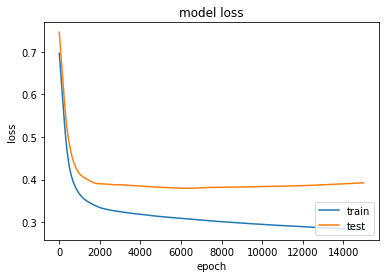

In [78]:
plt.plot(history['loss'])
plt.plot(history['test_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [79]:
print(history['accuracy'][-1])

0.888283378746594


In [ ]:
history['test_accuracy']

In [30]:
15000,0.01,0.9
15000,0.01,0.8

(15000, 0.01, 0.8)